## Goal Management Analysis in Cost Reduction (Flag 77)

### Dataset Description
The dataset consists of 500 entries simulating ServiceNow `sn_gf_goal` table, which details various attributes related to organizational goals. These attributes include goal state, owner, department, start and end dates, and description, alongside metrics such as priority, percent complete, and target percentage. This data primarily tracks the progression and management of departmental and individual goals, offering insights into the effectiveness and alignment of these goals with broader organizational objectives. Additionally, the table captures updates made to each goal, providing a timeline of modifications and the identity of individuals making these updates.


### Your Task
**Goal**: Investigate the factors that contribute to the swift completion of goals in the Finance department compared to others, assess the impact on overall departmental performance.

**Role**: Performance Analyst in Enterprise Goal Management

**Difficulty**: 3 out of 5. The intricate data patterns and need for nuanced analysis make this a challenging task, requiring advanced analytical skills to interpret the data effectively and derive actionable insights.

**Category**: Goal Management

### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [2]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

## Load Dataset
This cell loads the goals dataset used in the analysis. The dataset is assumed to be stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [3]:
dataset_path = "csvs/flag-77.csv"
goal_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
goal_data.head()


,start_date,priority,metric,target_percentage,department,percent_complete,end_date,state,category,owner,sys_updated_by,sys_id,description
0,2022-03-09,Medium,Employee Turnover Rate,58,Finance,7,2022-04-25,In Progress,Cost Reduction,Logan Muhl,admin,G000000,Reduce operational expenses by optimizing ener...
1,2022-04-23,High,Sales Increase,57,Finance,87,2022-11-23,Completed,Revenue Growth,Gisela Kosicki,admin,G000001,Increase annual subscription sales by 20% by e...
2,2022-12-16,Medium,Survey Score,66,HR,60,2023-10-20,In Progress,Efficiency,Ramon Amaral,admin,G000002,Optimize IT support workflows to reduce ticket...
3,2022-10-08,High,Employee Turnover Rate,87,Marketing,89,2023-06-02,Completed,Customer Satisfaction,Jacinto Gawron,admin,G000003,Increase the customer satisfaction score from ...
4,2022-10-26,High,Expense Ratio,93,HR,12,2023-09-13,In Progress,Efficiency,Renae Eldrige,admin,G000004,Enhance software deployment process to reduce ...



### **Question 1: What is the completion rate trend for high-priority projects across different departments over time?**


#### Plotting Completion Rate Trends for High-Priority Projects
This visualization examines how the completion rate for high-priority projects varies over time within different departments. By analyzing the trends, we can gain insights into which departments effectively manage their high-priority projects and how progress is distributed across different periods.

<ipython-input-4-b78e095760e7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_priority_data["start_date"] = pd.to_datetime(high_priority_data["start_date"])
<ipython-input-4-b78e095760e7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_priority_data["year_month"] = high_priority_data["start_date"].dt.to_period("M")


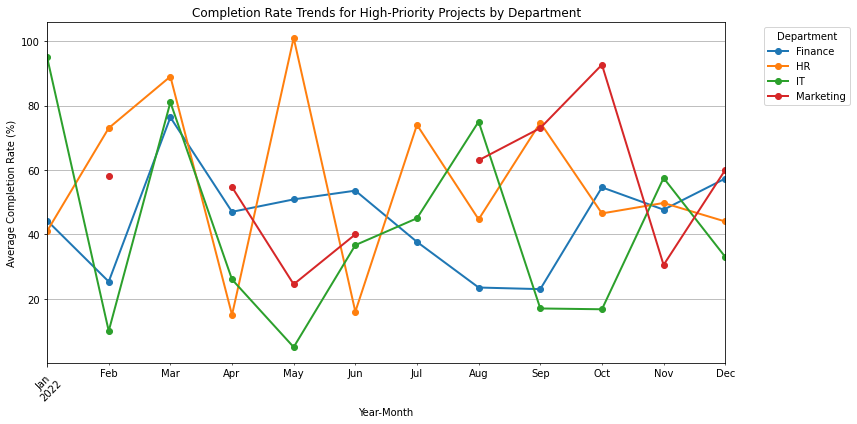

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
flag_data = pd.read_csv("csvs/flag-77.csv")

# Filter for high-priority projects
high_priority_data = flag_data[flag_data["priority"] == "High"]

# Convert dates to datetime format for easier manipulation
high_priority_data["start_date"] = pd.to_datetime(high_priority_data["start_date"])

# Calculate the average percent completion per department by month and year
high_priority_data["year_month"] = high_priority_data["start_date"].dt.to_period("M")
completion_trend = (
    high_priority_data.groupby(["year_month", "department"])["percent_complete"]
    .mean()
    .unstack()
)

# Plotting the trend
plt.figure(figsize=(12, 8))
completion_trend.plot(marker="o", linewidth=2, figsize=(12, 6), ax=plt.gca())

plt.title("Completion Rate Trends for High-Priority Projects by Department")
plt.xlabel("Year-Month")
plt.ylabel("Average Completion Rate (%)")
plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

# Formatting x-axis for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [5]:
{
    "data_type": "time_series",
    "insight": "HR and Marketing departments demonstrate higher completion rates in high-priority projects compared to other departments.",
    "insight_value": {
        "description": "HR leads with an average completion rate of 55.7%, with peaks reaching up to 101% in some months, possibly due to completion of tasks above initial targets. Marketing follows closely, averaging 55.1% with consistent completion rates above 60% in many months. In contrast, the IT and Finance departments have lower and more variable completion rates, suggesting potential resource or priority challenges."
    },
    "plot": {
        "plot_type": "line",
        "title": "Completion Rate Trends for High-Priority Projects by Department",
        "x_axis": {
            "name": "Year-Month",
            "value": "Monthly intervals across multiple years",
            "description": "Each point represents the average completion rate for high-priority projects in that department for a given month.",
        },
        "y_axis": {
            "name": "Average Completion Rate (%)",
            "value": "Percentages ranging from 5% to over 100%",
            "description": "Indicates the degree of completion, where rates exceeding 100% may reflect extra-mile efforts.",
        },
        "description": "The line plot captures monthly average completion rates across departments, highlighting HR and Marketing as departments with relatively higher and more stable completion rates in high-priority projects.",
    },
    "question": "What is the completion rate trend for high-priority projects across different departments over time?",
    "actionable_insight": "The HR and Marketing departments' success in maintaining high completion rates for high-priority projects suggests effective project prioritization or resource management. IT and Finance departments may benefit from exploring similar strategies to improve completion consistency and address challenges in meeting project targets. Implementing cross-departmental best practices could support more balanced and efficient project completion rates across all teams.",
}

{'data_type': 'time_series',
 'insight': 'HR and Marketing departments demonstrate higher completion rates in high-priority projects compared to other departments.',
 'insight_value': {'description': 'HR leads with an average completion rate of 55.7%, with peaks reaching up to 101% in some months, possibly due to completion of tasks above initial targets. Marketing follows closely, averaging 55.1% with consistent completion rates above 60% in many months. In contrast, the IT and Finance departments have lower and more variable completion rates, suggesting potential resource or priority challenges.'},
 'plot': {'plot_type': 'line',
  'title': 'Completion Rate Trends for High-Priority Projects by Department',
  'x_axis': {'name': 'Year-Month',
   'value': 'Monthly intervals across multiple years',
   'description': 'Each point represents the average completion rate for high-priority projects in that department for a given month.'},
  'y_axis': {'name': 'Average Completion Rate (%)',
   '

### **Question 2:** What is distribution of Goal types in Finance department?

#### Plot goal category distribution within the Finance department

This pie chart illustrates the proportional distribution of different goal categories within the Finance department, highlighting the dominant categories and their respective shares. This visualization is crucial for understanding the strategic focus areas within the department, based on the types of goals they prioritize.

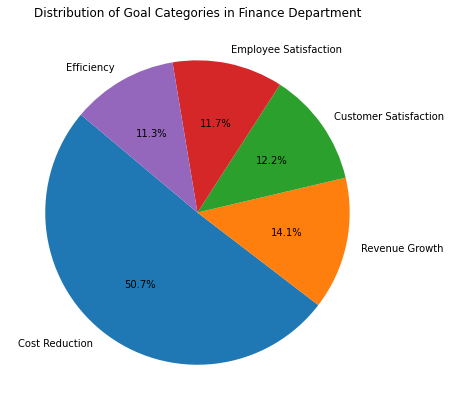

In [6]:
import matplotlib.pyplot as plt

# Filter data for the Finance department
finance_goals = goal_data[goal_data['department'] == 'Finance']

# Count the occurrence of each category in the Finance department
category_counts = finance_goals['category'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Goal Categories in Finance Department')
plt.show()


#### Generate JSON Description for the Insight

In [7]:
{
    "data_type": "diagnostic",
    "insight": "There is a dominance of 'Cost Reduction' goals within the Finance department",
    "insight_value": {
        "Cost Reduction": "50.7%",
        "Revenue Growth": "14.1%",
        "Efficiency": "11.3%",
        "Employee Satisfaction": "11.7%",
        "Customer Satisfaction": "12.2%"
    },
    "plot": {
        "plot_type": "pie",
        "title": "Distribution of Goal Categories in the Finance Department",
        "x_axis": {
            "name": "None",
            "value": "None",
            "description": "Pie charts do not use x-axis representations."
        },
        "y_axis": {
            "name": "None",
            "value": "None",
            "description": "Pie charts do not use y-axis representations."
        },
        "description": "The pie chart highlights the distribution of goals by category within the Finance department. It shows a significant majority of 50.7% for 'Cost Reduction', followed by 14.1% for 'Revenue Growth', 12.2% for 'Customer Satisfaction', 11.7% for 'Employee Satisfaction', and 11.3% for 'Efficiency'. The predominant share of 'Cost Reduction' goals necessitates further analysis to understand its correlation with the notably shorter goal durations observed in this department."
    },
    "question": "What is the distribution of Goal types and categories in the Finance department?",
    "actionable_insight": "Given the high proportion of 'Cost Reduction' goals, it is imperative to delve deeper into understanding how this focus impacts overall goal durations and departmental efficiencies. Analyzing the relationship between the goal category and duration could uncover strategies that significantly enhance productivity and goal achievement rates. This could lead to strategic adjustments that balance goal types more effectively and potentially replicate successful practices across other departments."
}


{'data_type': 'diagnostic',
 'insight': "There is a dominance of 'Cost Reduction' goals within the Finance department",
 'insight_value': {'Cost Reduction': '50.7%',
  'Revenue Growth': '14.1%',
  'Efficiency': '11.3%',
  'Employee Satisfaction': '11.7%',
  'Customer Satisfaction': '12.2%'},
 'plot': {'plot_type': 'pie',
  'title': 'Distribution of Goal Categories in the Finance Department',
  'x_axis': {'name': 'None',
   'value': 'None',
   'description': 'Pie charts do not use x-axis representations.'},
  'y_axis': {'name': 'None',
   'value': 'None',
   'description': 'Pie charts do not use y-axis representations.'},
  'description': "The pie chart highlights the distribution of goals by category within the Finance department. It shows a significant majority of 50.7% for 'Cost Reduction', followed by 14.1% for 'Revenue Growth', 12.2% for 'Customer Satisfaction', 11.7% for 'Employee Satisfaction', and 11.3% for 'Efficiency'. The predominant share of 'Cost Reduction' goals necessitat

### **Question 3:** What is distribution of Goal priorities in Finance department?

#### Plot priority distribution within the Finance department

This pie chart provides a clear visual representation of the distribution of goal priorities within the Finance department, emphasizing the prevalence of each priority level and aiding in the assessment of focus and urgency applied to different objectives.

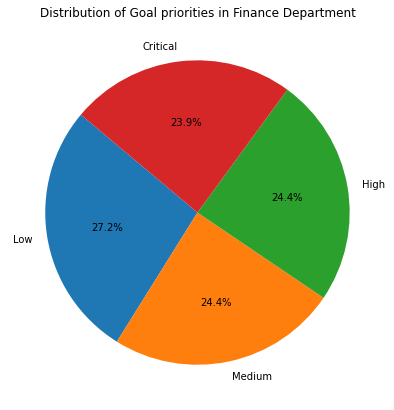

In [8]:
import matplotlib.pyplot as plt

# Filter data for the Finance department
finance_goals = goal_data[goal_data['department'] == 'Finance']

# Count the occurrence of each category in the Finance department
category_counts = finance_goals['priority'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Goal priorities in Finance Department')
plt.show()


#### Generate JSON Description for the Insight

In [9]:
{
    "data_type": "diagnostic",
    "insight": "There is a uniform distribution of goal priorities in the Finance department",
    "insight_value": {
        "Critical": "23.9%",
        "High": "24.4%",
        "Medium": "24.4%",
        "Low": "27.2%"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Distribution of Goal Priorities in the Finance Department",
        "x_axis": {
            "name": "Priority Level",
            "value": "Critical, High, Medium, Low",
            "description": "This represents the different priority levels assigned to goals within the Finance department."
        },
        "y_axis": {
            "name": "Percentage of Goals",
            "value": "mean is 25% across all priorities",
            "description": "This shows the percentage of goals classified under each priority level, indicating an even distribution across priorities."
        },
        "description": "The bar graph illustrates a uniform distribution of goal priorities within the Finance department, with each priority level—Critical, High, Medium, and Low—comprising 25% of goals. This even distribution suggests that the variation in goal durations and success rates may more likely be influenced by factors related to goal category rather than priority."
    },
    "question": "What is the distribution of Goal priorities in the Finance department?",
    "actionable_insight": "Given the uniform distribution of priorities, further analysis should focus on goal categories to uncover potential factors influencing goal durations and success rates in the Finance department. Understanding how different categories impact goal outcomes could provide strategic insights into effective goal management and resource allocation."
}


{'data_type': 'diagnostic',
 'insight': 'There is a uniform distribution of goal priorities in the Finance department',
 'insight_value': {'Critical': '23.9%',
  'High': '24.4%',
  'Medium': '24.4%',
  'Low': '27.2%'},
 'plot': {'plot_type': 'bar',
  'title': 'Distribution of Goal Priorities in the Finance Department',
  'x_axis': {'name': 'Priority Level',
   'value': 'Critical, High, Medium, Low',
   'description': 'This represents the different priority levels assigned to goals within the Finance department.'},
  'y_axis': {'name': 'Percentage of Goals',
   'value': 'mean is 25% across all priorities',
   'description': 'This shows the percentage of goals classified under each priority level, indicating an even distribution across priorities.'},
  'description': 'The bar graph illustrates a uniform distribution of goal priorities within the Finance department, with each priority level—Critical, High, Medium, and Low—comprising 25% of goals. This even distribution suggests that the v

### **Question 4:** What is the distribution of Goal distribution by category across all departments?

#### Plot goal Duration by category across departments

This box plot visualizes the distribution of goal durations across various categories in all departments. By displaying median and mean durations, it helps identify which goal categories tend to have longer or shorter completion times, providing insights into efficiencies and priorities across organization.

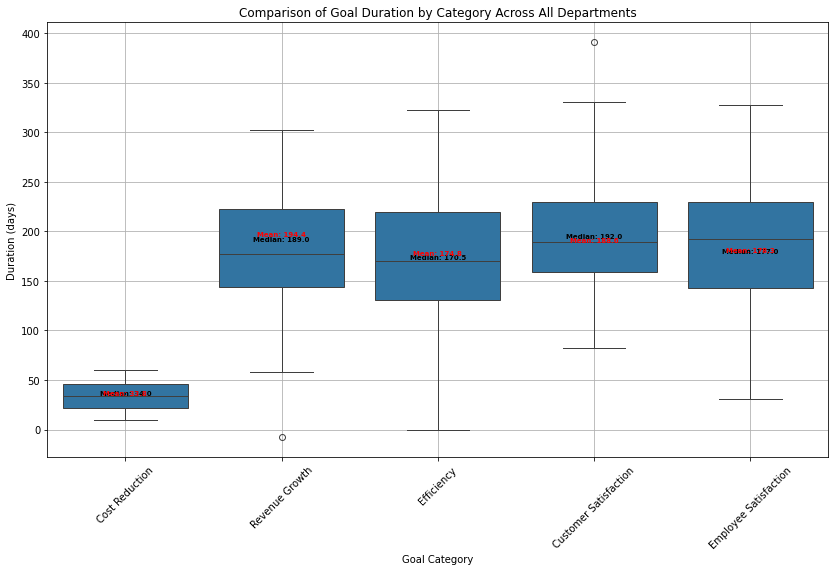

In [11]:
# Convert date columns to datetime first
goal_data["start_date"] = pd.to_datetime(goal_data["start_date"])
goal_data["end_date"] = pd.to_datetime(goal_data["end_date"])

# Calculate goal durations in days
goal_data["duration"] = (
    pd.to_datetime(goal_data["end_date"]) - pd.to_datetime(goal_data["start_date"])
).dt.days

# Plotting
plt.figure(figsize=(14, 8))
box_plot = sns.boxplot(x="category", y="duration", data=goal_data)
plt.title("Comparison of Goal Duration by Category Across All Departments")
plt.xlabel("Goal Category")
plt.ylabel("Duration (days)")
plt.xticks(rotation=45)  # Rotate category names for better readability
plt.grid(True)

# Calculate median and mean for annotations
medians = goal_data.groupby(["category"])["duration"].median()
means = goal_data.groupby(["category"])["duration"].mean()

# Iterate over the categories to place the text annotations for median and mean
for xtick in box_plot.get_xticks():
    box_plot.text(
        xtick,
        medians[xtick] + 1,
        f"Median: {medians[xtick]:.1f}",
        horizontalalignment="center",
        size="x-small",
        color="black",
        weight="semibold",
    )
    box_plot.text(
        xtick,
        means[xtick] + 1,
        f"Mean: {means[xtick]:.1f}",
        horizontalalignment="center",
        size="x-small",
        color="red",
        weight="semibold",
    )

plt.show()

#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "analytical",
    "insight": "The cost reduction goals have significantly shorter average durations compared to other categories",
    "insight_value": {
        "Most Prominent Value": "Cost Reduction goals average 33.8 days",
        "Next Closest Category": "Employee Satisfaction at 178.3 days"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Goal Duration by Category Across All Departments",
        "x_axis": {
            "name": "Category",
            "value": "Cost Reduction, Revenue Growth, Efficiency, Customer Satisfaction, Employee Satisfaction",
            "description": "This represents the different goal categories analyzed across all departments."
        },
        "y_axis": {
            "name": "Average Goal Duration (days)",
            "value": "Cost Reduction: 33.8, Revenue Growth: 194.4, Efficiency: 174.8, Customer Satisfaction: 188.6, Employee Satisfaction: 178.3",
            "description": "This shows the average duration in days for goals within each category, highlighting the efficiency of Cost Reduction goals."
        },
        "description": "The bar graph displays the average durations for goals by category across all departments, with the Cost Reduction category showing a notably lower average duration of 33.8 days, which is significantly less than those of other categories. This stark contrast underscores the efficiency and streamlined processes potentially inherent in Cost Reduction initiatives."
    },
    "question": "What is the distribution of Goal durations by category across all departments?",
    "actionable_insight": "The significantly shorter duration of 'Cost Reduction' goals suggests a need to investigate the practices, resource allocations, and strategies that contribute to such efficiency. Applying these effective approaches from the 'Cost Reduction' category to other categories may help reduce durations and enhance overall productivity."
}


{'data_type': 'analytical',
 'insight': 'The cost reduction goals have significantly shorter average durations compared to other categories',
 'insight_value': {'Most Prominent Value': 'Cost Reduction goals average 33.8 days',
  'Next Closest Category': 'Employee Satisfaction at 178.3 days'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Goal Duration by Category Across All Departments',
  'x_axis': {'name': 'Category',
   'value': 'Cost Reduction, Revenue Growth, Efficiency, Customer Satisfaction, Employee Satisfaction',
   'description': 'This represents the different goal categories analyzed across all departments.'},
  'y_axis': {'name': 'Average Goal Duration (days)',
   'value': 'Cost Reduction: 33.8, Revenue Growth: 194.4, Efficiency: 174.8, Customer Satisfaction: 188.6, Employee Satisfaction: 178.3',
   'description': 'This shows the average duration in days for goals within each category, highlighting the efficiency of Cost Reduction goals.'},
  'description': 'The bar gra

### Summary of Findings (Flag 77):

1. **High Completion Rates in HR and Marketing**: From Question 1, it was observed that HR and Marketing departments maintain higher completion rates for high-priority projects compared to other departments. This suggests effective project prioritization and resource management strategies in these departments.

2. **Dominance of Cost Reduction Goals in Finance**: As noted in Question 2, the Finance department predominantly focuses on 'Cost Reduction' goals, which constitute 50.7% of their goals. This strategic focus may contribute to the shorter goal durations observed in this department.

3. **Uniform Distribution of Goal Priorities in Finance**: Question 3 highlights that the Finance department has a uniform distribution of goal priorities, with each priority level comprising approximately 25% of goals. This even distribution suggests that factors other than priority, such as goal category, may influence goal durations and success rates.